In [1]:
import pandas as pd 
import numpy as np

data=pd.read_csv('quikr_car.csv')
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


## Cleaning

In [2]:
data.name=data.name.apply(lambda x:" ".join(x.split()[0:3]))

In [3]:
data=data[data.year.str.isnumeric()]

In [4]:
data[data.company=='tata'].rename({'tata':'Tata'})

,name,company,year,Price,kms_driven,fuel_type


In [5]:
values_to_remove = ['Sale', 'URGENT', 'Used', 'i', '9', '7', 'selling', 'all', 'Tara', 'Any','I']
data = data[~data['company'].isin(values_to_remove)]
data.company.unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [6]:
data=data[data.Price!='Ask For Price']
data.Price.unique()

array(['80,000', '4,25,000', '3,25,000', '5,75,000', '1,75,000',
       '1,90,000', '8,30,000', '2,50,000', '1,82,000', '3,15,000',
       '4,15,000', '3,20,000', '10,00,000', '5,00,000', '3,50,000',
       '1,60,000', '3,10,000', '75,000', '1,00,000', '2,90,000', '95,000',
       '1,80,000', '3,85,000', '1,05,000', '6,50,000', '6,89,999',
       '4,48,000', '5,49,000', '5,01,000', '4,89,999', '2,80,000',
       '3,49,999', '2,84,999', '3,45,000', '4,99,999', '2,35,000',
       '2,49,999', '14,75,000', '3,95,000', '2,20,000', '1,70,000',
       '85,000', '2,00,000', '5,70,000', '1,10,000', '4,48,999',
       '18,91,111', '1,59,500', '3,44,999', '4,49,999', '8,65,000',
       '6,99,000', '3,75,000', '2,24,999', '12,00,000', '1,95,000',
       '3,51,000', '2,40,000', '90,000', '1,55,000', '6,00,000',
       '1,89,500', '2,10,000', '3,90,000', '1,35,000', '16,00,000',
       '7,01,000', '2,65,000', '5,25,000', '3,72,000', '6,35,000',
       '5,50,000', '4,85,000', '3,29,500', '2,51,111', 

In [7]:
data.Price=data.Price.apply(lambda x: "".join(x.split(',')))

In [8]:
data.sample(10)

,name,company,year,Price,kms_driven,fuel_type
189,Mini Cooper S,Mini,2013,1891111,"13,000 kms",Petrol
539,Maruti Suzuki Wagon,Maruti,2003,130000,"1,33,000 kms",Petrol
731,Chevrolet Beat LT,Chevrolet,2015,215000,"90,000 kms",Diesel
228,Mahindra Thar CRDe,Mahindra,2016,730000,"29,000 kms",Diesel
142,Toyota Innova 2.5,Toyota,2012,849999,"99,000 kms",Diesel
208,Maruti Suzuki Alto,Maruti,2010,135000,"34,580 kms",Petrol
36,Renault Lodgy 85,Renault,2018,689999,"20,000 kms",Diesel
655,Maruti Suzuki Ciaz,Maruti,2016,650000,"50,000 kms",Petrol
10,Skoda Fabia Classic,Skoda,2010,182000,"60,000 kms",Petrol
871,Hyundai i20 Select,Hyundai,2011,290000,"40,000 kms",Petrol


In [9]:
data.Price=data.Price.astype(int)

In [10]:
data=data[data.kms_driven!='Petrol']

In [11]:
data.kms_driven=data.kms_driven.apply(lambda x:"".join(x.split()[0].split(',')))

In [12]:
data.sample(10)

,name,company,year,Price,kms_driven,fuel_type
153,Ford EcoSport,Ford,2017,489999,39000,Petrol
321,Maruti Suzuki Ertiga,Maruti,2018,799999,9000,Diesel
637,Nissan Sunny XL,Nissan,2011,230000,52000,Petrol
827,Hyundai i20 Asta,Hyundai,2014,425000,31000,Petrol
41,Honda City 1.5,Honda,2011,280000,33000,Petrol
589,Tata Indigo eCS,Tata,2014,95000,195000,Diesel
420,Renault Duster 85,Renault,2015,715000,65000,Diesel
556,Honda City 1.5,Honda,2009,269000,55000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel
73,Mini Cooper S,Mini,2013,1891111,13000,Petrol


<Axes: >

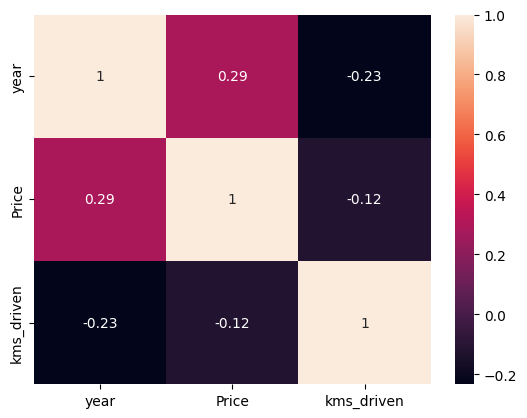

In [13]:
import seaborn as sns
sns.heatmap(data.loc[:,['year','Price','kms_driven']].corr(),annot=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    object
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(1), object(5)
memory usage: 41.5+ KB


In [15]:
data.year=data.year.astype(int)
data.kms_driven=data.kms_driven.astype(int)


In [16]:
data=data[~data.fuel_type.isna()]
data.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [17]:
data.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [18]:
data[data.Price>6e6]

,name,company,year,Price,kms_driven,fuel_type
562,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [19]:
data=data[data.Price!=8500003].reset_index(drop=True)

In [20]:
data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


## Analysing

C:\Users\adit4\AppData\Local\Temp\ipykernel_18940\2804142540.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


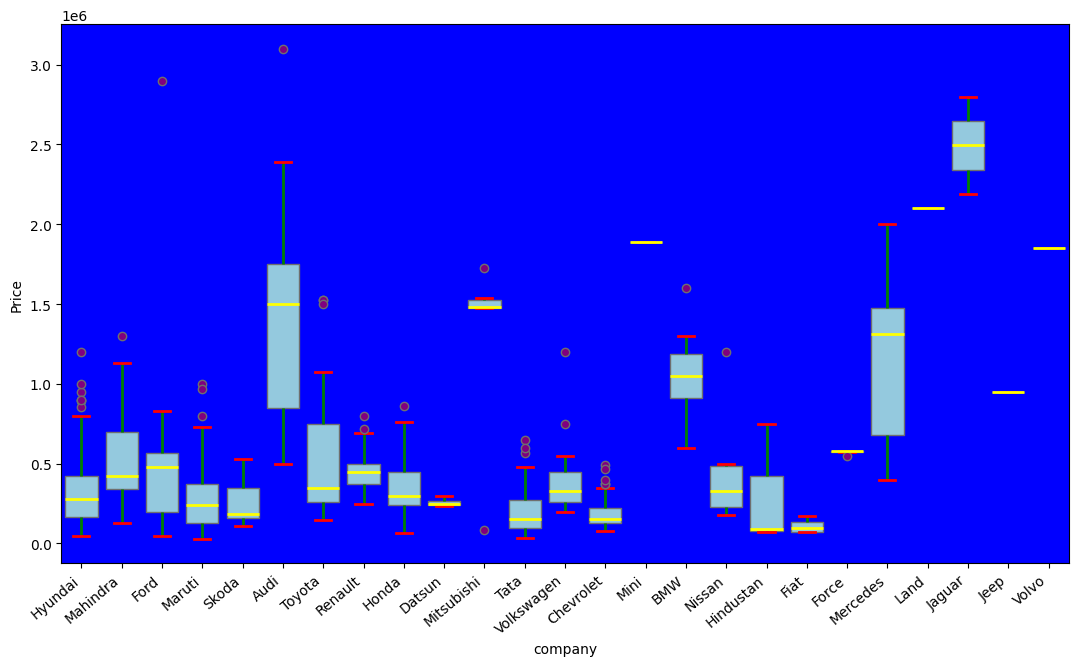

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,7))
ax = sns.boxplot(x='company', y='Price', data=data, color='skyblue', 
                 whiskerprops=dict(color='green', linewidth=2),
                 capprops=dict(color='red', linewidth=2),
                 medianprops=dict(color='yellow', linewidth=2),
                 flierprops=dict(markerfacecolor='purple', marker='o'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')

ax = plt.gca()  # Get the current axes.
ax.set_facecolor('blue')

plt.show()


C:\Users\adit4\AppData\Local\Temp\ipykernel_18940\3170751674.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


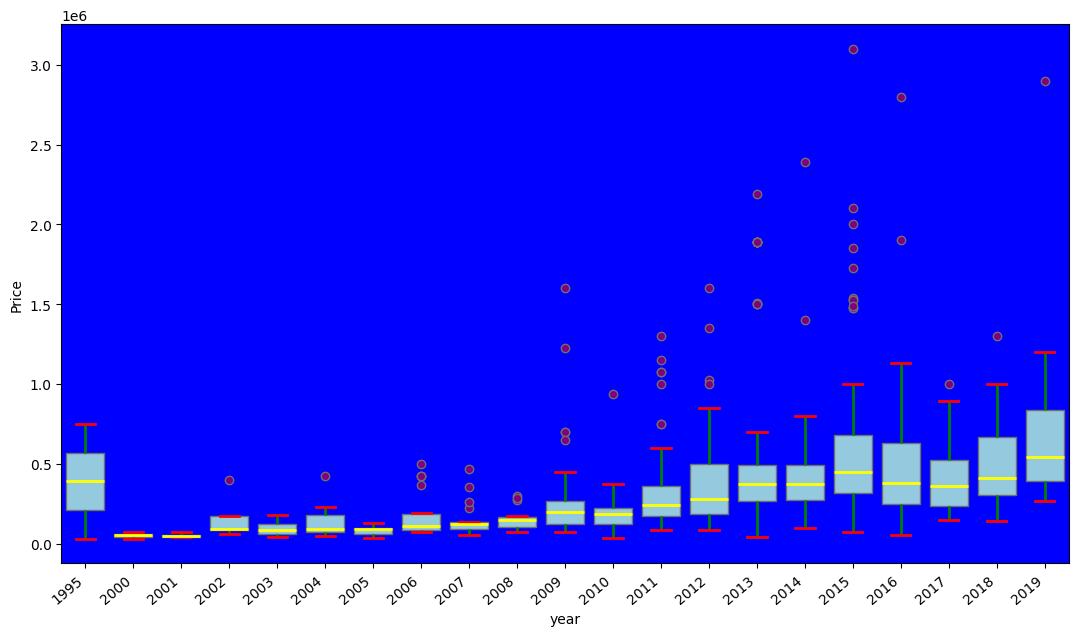

In [22]:
plt.figure(figsize=(13,7))
ax = sns.boxplot(x='year', y='Price', data=data, color='skyblue', 
                 whiskerprops=dict(color='green', linewidth=2),
                 capprops=dict(color='red', linewidth=2),
                 medianprops=dict(color='yellow', linewidth=2),
                 flierprops=dict(markerfacecolor='purple', marker='o'))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')

ax = plt.gca()  # Get the current axes.
ax.set_facecolor('blue')

plt.show()


c:\Users\adit4\anaconda3\envs\myen\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\adit4\anaconda3\envs\myen\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\adit4\anaconda3\envs\myen\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\adit4\anaconda3\envs\myen\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\adit4\anaconda3\envs\myen\Lib\site-packages\seaborn\cate

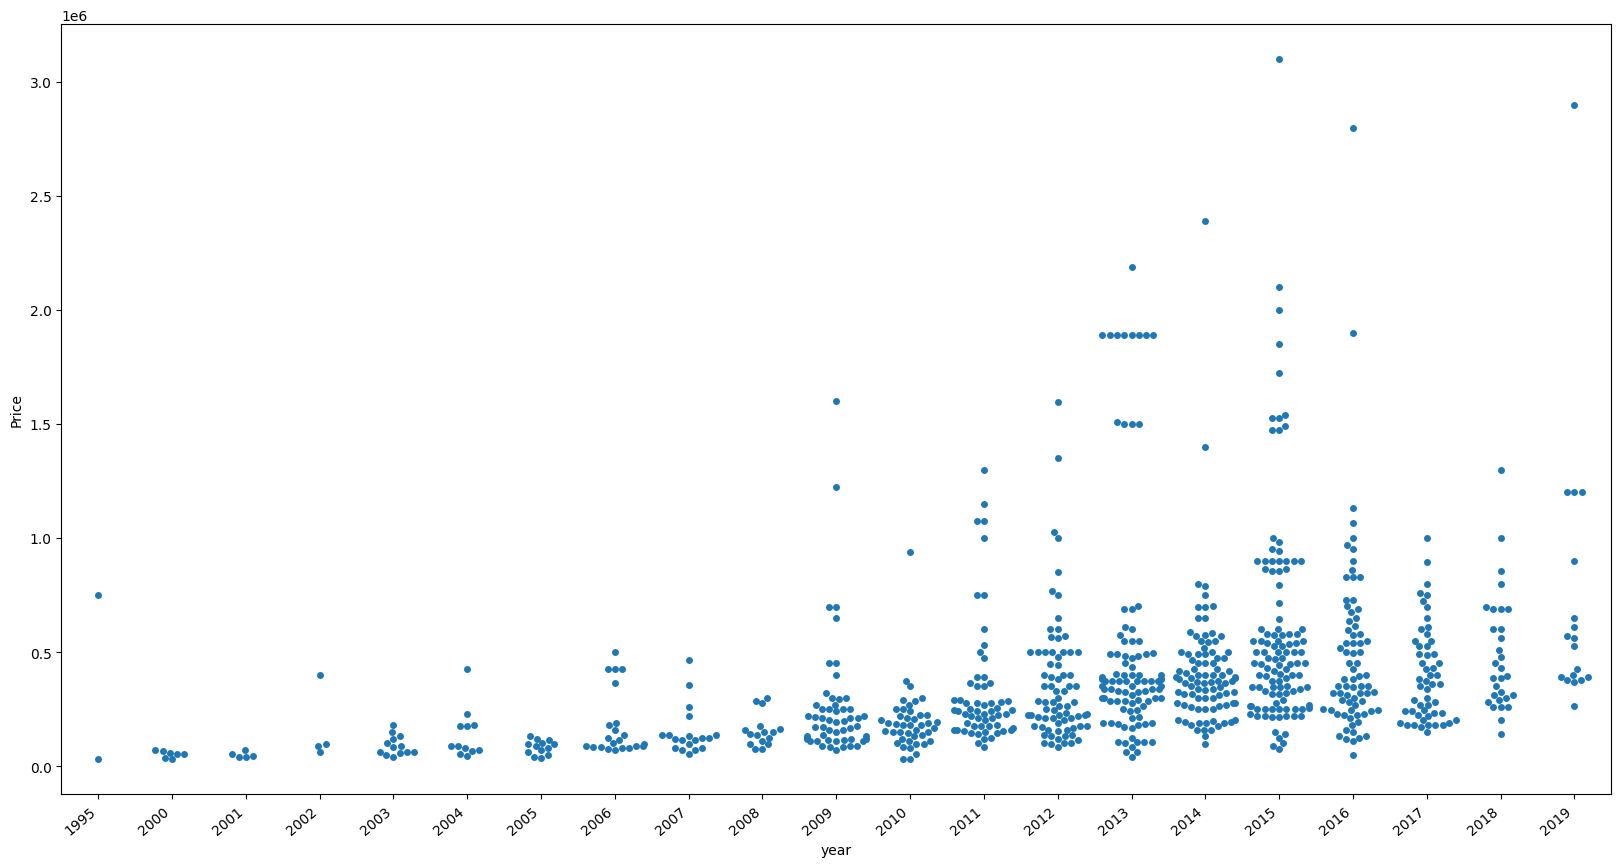

In [23]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

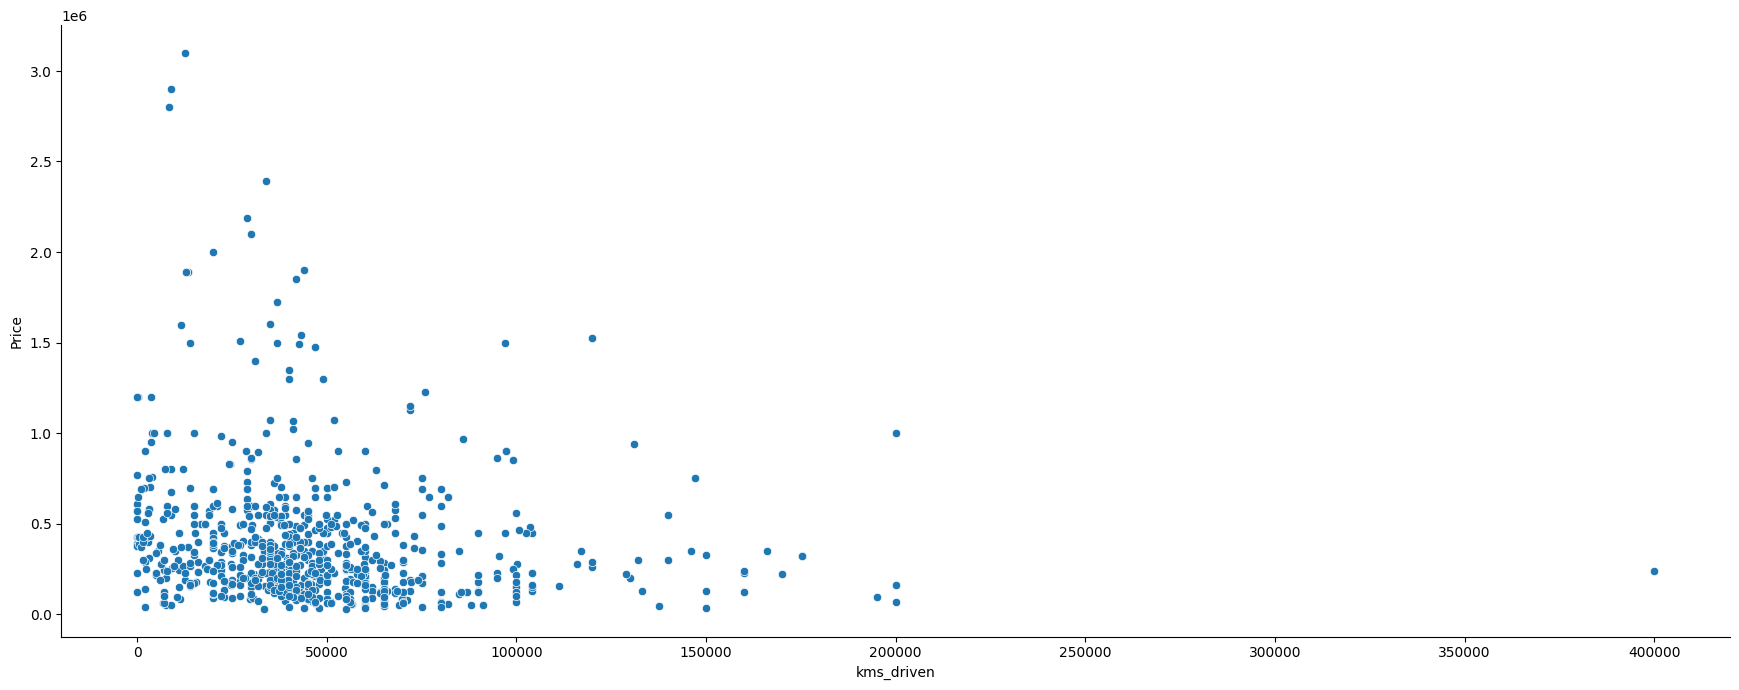

In [24]:
sns.relplot(x='kms_driven',y='Price',data=data,height=7,aspect=2.5)

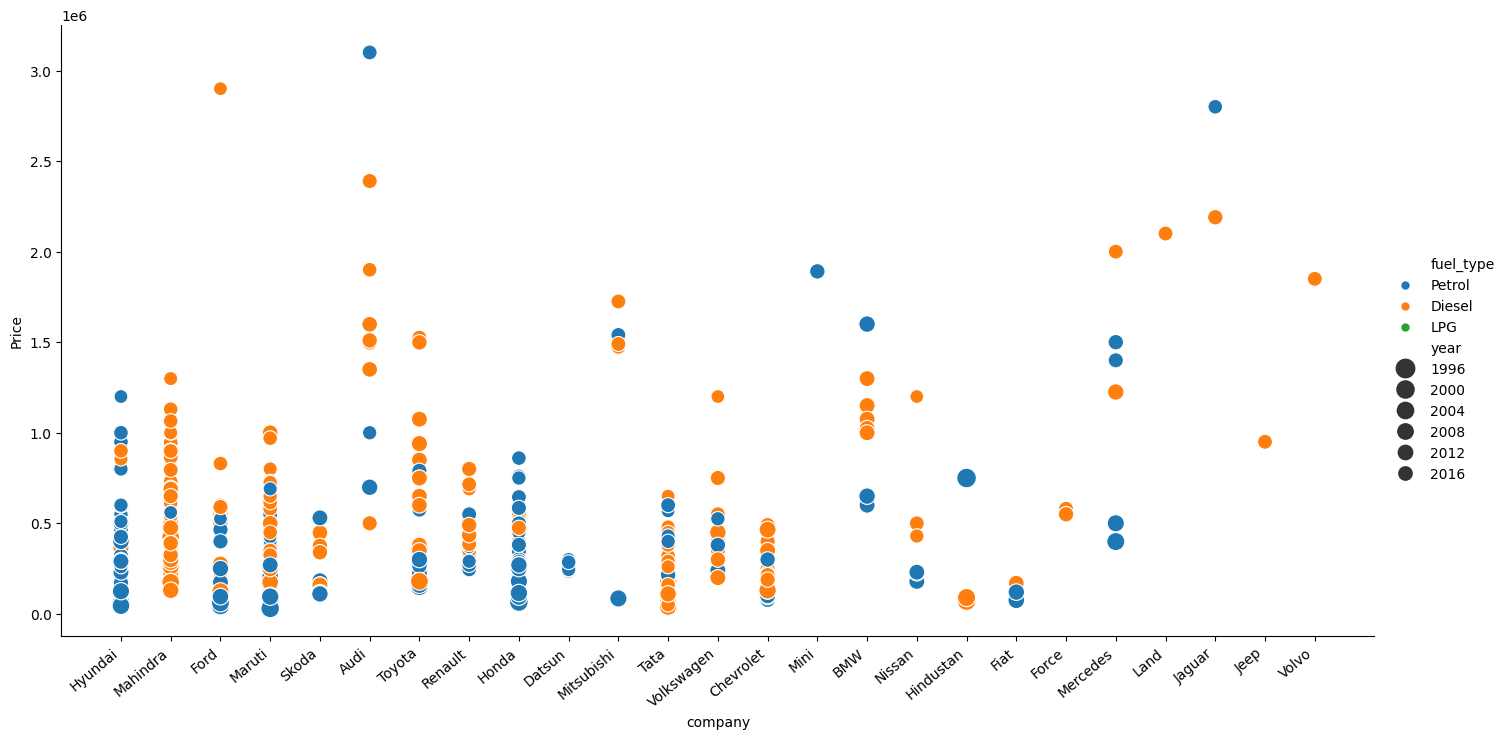

In [25]:
ax=sns.relplot(x='company',y='Price',data=data,hue='fuel_type',size='year',height=7,aspect=2,sizes=(200,100))
ax.set_xticklabels(rotation=40,ha='right')

## Model Building

In [26]:
X=data[['year','kms_driven','company','name','fuel_type']]
y=data['Price']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
# Creating an OneHotEncoder object to contain all the possible categories
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe.fit(X[['name','company','fuel_type']])
# OneHotEncoder()
# Creating a column transformer to transform categorical columns
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')
# Linear Regression Model
lr=LinearRegression()
# Making a pipeline
pipe=make_pipeline(column_trans,lr)
# Fitting the model
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

c:\Users\adit4\anaconda3\envs\myen\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.6563991018591941

In [27]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [28]:
np.argmax(scores),scores[302]

(302, 0.8991157554877304)

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)
import pickle
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))
data.to_csv('Cleaned.csv',index=False)

In [30]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))


array([456670.3272301])

In [31]:
pipe.steps[0][1].transformers[0][1].categories[0]
pipe.steps[0][1].transformers[0][1]
ohe.categories_[2]
pipe.steps[0][1].transformers[0][2]
# column_trans.transformers[0][1]

['name', 'company', 'fuel_type']